**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os 
from dotenv import load_dotenv 
env_path = "./config/.env" 
load_dotenv(dotenv_path=env_path) 
 
api_key = os.getenv("GOOGLE_API_KEY") 
print(api_key[0])

A


In [9]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.0-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [10]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of discovering patterns, anomalies, and other useful information in large datasets. It's essentially the process of sifting through mountains of data to find hidden insights that can be used to make better decisions.

Here's a breakdown of key aspects:

*   **Goal:** To extract valuable knowledge from data that can be used for various purposes, such as:
    *   Predicting future trends
    *   Identifying customer behavior
    *   Improving business processes
    *   Detecting fraud
    *   Personalizing recommendations
*   **Data Sources:** Data mining can be applied to various data sources, including:
    *   Databases
    *   Data warehouses
    *   Transaction logs
    *   Web data
    *   Social media
    *   Sensor data
*   **Techniques:** Data mining employs a variety of techniques, including:
    *   **Classification:** Categorizing data into predefined classes (e.g., classifying emails as spam or not spam).
    *   **Clustering:** Grouping similar da

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [19]:
print(logs)

{'model': 'gemini-2.0-flash-lite', 'input_tokens': 10, 'output_tokens': 602}


**We can use the IPython library to make the response look better:**

In [20]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of discovering patterns, anomalies, and other useful information in large datasets. It's essentially the process of sifting through mountains of data to find hidden insights that can be used to make better decisions.

Here's a breakdown of key aspects:

*   **Goal:** To extract valuable knowledge from data that can be used for various purposes, such as:
    *   Predicting future trends
    *   Identifying customer behavior
    *   Improving business processes
    *   Detecting fraud
    *   Personalizing recommendations
*   **Data Sources:** Data mining can be applied to various data sources, including:
    *   Databases
    *   Data warehouses
    *   Transaction logs
    *   Web data
    *   Social media
    *   Sensor data
*   **Techniques:** Data mining employs a variety of techniques, including:
    *   **Classification:** Categorizing data into predefined classes (e.g., classifying emails as spam or not spam).
    *   **Clustering:** Grouping similar data points together (e.g., segmenting customers based on their purchasing behavior).
    *   **Association rule mining:** Discovering relationships between items in a dataset (e.g., finding that customers who buy diapers often also buy baby wipes).
    *   **Regression:** Predicting a continuous value based on other variables (e.g., predicting sales based on advertising spend).
    *   **Anomaly detection:** Identifying unusual data points that deviate from the norm (e.g., detecting fraudulent transactions).
    *   **Time series analysis:** Analyzing data points collected over time to identify trends and patterns (e.g., forecasting stock prices).
*   **Process:** The data mining process typically involves the following steps:
    1.  **Data collection:** Gathering data from various sources.
    2.  **Data cleaning:** Removing errors, inconsistencies, and missing values.
    3.  **Data transformation:** Converting data into a suitable format for analysis.
    4.  **Data mining:** Applying data mining techniques to extract patterns.
    5.  **Pattern evaluation:** Assessing the significance and usefulness of the discovered patterns.
    6.  **Knowledge presentation:** Communicating the findings in a clear and understandable way.
*   **Applications:** Data mining is used in a wide range of industries, including:
    *   **Retail:** Customer relationship management, targeted marketing, fraud detection.
    *   **Finance:** Risk assessment, fraud detection, credit scoring.
    *   **Healthcare:** Disease diagnosis, patient profiling, drug discovery.
    *   **Marketing:** Customer segmentation, campaign optimization, recommendation systems.
    *   **Manufacturing:** Quality control, predictive maintenance, supply chain optimization.

In essence, data mining is about turning raw data into actionable insights that can drive better decision-making and improve business outcomes.


---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [21]:
#Answer here

#In tasks 1, 2, and 3, we can see that Gemini-2.5-Pro provides a well-organized explanation — from choosing shoes, 
#to defense, offense, teamwork, and even feedback and improvement.

#In contrast, Gemini-2.0-Flash-Lite simply keeps giving examples without structure, as if it’s just listing knowledge in a long sequence.

#Gemini-2.0-Flash is similar to Gemini-2.0-Flash-Lite, except that its responses are much shorter.

#When using Gemini-2.5-Pro with a changed system prompt, the model’s output is clearly influenced by that prompt — for example, 
#if you say “give me 200 words,” it will produce roughly 200 words.

In [22]:
#gemini-2.0-flash-lite
input_prompt = ["How to play basketball?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))

Okay, let's break down how to play basketball! Here's a comprehensive guide, covering the basics to get you started:

**I. The Basics: The Goal of the Game**

*   **Objective:** The primary goal is to score more points than the opposing team by shooting the ball through their hoop (basket).
*   **Scoring:**
    *   **Field Goal (Basket):**
        *   2 points: Made from inside the three-point arc (the curved line around the basket).
        *   3 points: Made from beyond the three-point arc.
    *   **Free Throw:** 1 point: Awarded after a foul is committed.

**II. Equipment**

*   **Basketball:** A round ball, typically made of leather or synthetic material. The size and weight vary depending on the age and gender of the players.
    *   **Men's:** Size 7 (official size)
    *   **Women's:** Size 6 (official size)
    *   **Youth:** Size 5 or smaller
*   **Basketball Court:** A rectangular surface with a basket (hoop) at each end.
*   **Hoops/Baskets:** Consist of a metal rim with a net attached, suspended 10 feet (3.05 meters) above the ground.
*   **Basketball Shoes:** Designed for the sport, providing good ankle support and traction.
*   **Uniforms:** Typically jerseys and shorts.

**III. Key Skills**

1.  **Dribbling:**
    *   **Purpose:** Moving the ball down the court while maintaining possession.
    *   **Technique:**
        *   Use your fingertips (not your palm) to control the ball.
        *   Keep your head up to see the court and your opponents.
        *   Dribble low to the ground for better control, especially when closely guarded.
        *   Use your body to shield the ball from defenders.
        *   Practice dribbling with both hands.
    *   **Types of Dribbles:**
        *   **Crossover:** Bouncing the ball from one hand to the other in front of your body.
        *   **Behind-the-Back:** Bouncing the ball behind your back to switch hands.
        *   **Between-the-Legs:** Bouncing the ball between your legs to switch hands.
        *   **Hesitation Dribble:** A deceptive move to fake a pass or shot.

2.  **Passing:**
    *   **Purpose:** Moving the ball to a teammate.
    *   **Types of Passes:**
        *   **Chest Pass:** Start with the ball at your chest, step forward, and push the ball directly to your teammate's chest.
        *   **Bounce Pass:** Bounce the ball on the floor about two-thirds of the way to your teammate.
        *   **Overhead Pass:** Used to pass over a defender, holding the ball above your head and throwing it.
        *   **Baseball Pass:** A long pass, thrown like a baseball.
    *   **Technique:**
        *   Grip the ball with your fingers spread.
        *   Step towards your target.
        *   Snap your wrists to generate power and accuracy.
        *   Follow through with your hands towards your target.

3.  **Shooting:**
    *   **Purpose:** Getting the ball into the basket.
    *   **Technique (The "BEEF" Method):**
        *   **B**alance: Have a balanced stance, feet shoulder-width apart, knees bent.
        *   **E**yes: Focus on the target (the basket).
        *   **E**lbow: Keep your shooting elbow tucked in towards your body.
        *   **F**ollow Through: Extend your arm fully, flick your wrist, and hold your follow-through until the ball goes through the hoop.
    *   **Types of Shots:**
        *   **Jump Shot:** Shooting the ball while jumping.
        *   **Layup:** A close-range shot, usually taken while driving towards the basket.
        *   **Free Throw:** A shot taken from the free-throw line after a foul.
        *   **Three-Point Shot:** A shot taken from beyond the three-point arc.

4.  **Rebounding:**
    *   **Purpose:** Gaining possession of the ball after a missed shot.
    *   **Technique:**
        *   Position yourself between your opponent and the basket.
        *   Box out your opponent by using your body to prevent them from getting to the ball.
        *   Jump and grab the ball with both hands.
        *   Secure the ball and bring it down to your chest.

5.  **Defense:**
    *   **Purpose:** Preventing the opposing team from scoring.
    *   **Technique:**
        *   **Stance:** Bend your knees, keep your back straight, and be ready to move.
        *   **Footwork:** Stay between your opponent and the basket.
        *   **Hand Position:** Keep your hands up to deflect passes and contest shots.
        *   **Communication:** Talk to your teammates to help with defensive assignments.

**IV. Gameplay**

1.  **Starting the Game:**
    *   The game typically begins with a jump ball at center court. Two players from opposing teams jump to try to tip the ball to their teammates.

2.  **Moving the Ball:**
    *   Players advance the ball by dribbling or passing.
    *   **Traveling:** A player cannot take more than two steps without dribbling the ball.

3.  **Offense:**
    *   The offensive team tries to score by shooting the ball into the basket.
    *   Players move the ball, set screens (blocking for teammates), and try to get open for shots.

4.  **Defense:**
    *   The defensive team tries to prevent the offensive team from scoring.
    *   Players guard their opponents, try to steal the ball, block shots, and rebound.

5.  **Fouls:**
    *   **Definition:** Illegal personal contact with an opponent.
    *   **Examples:** Pushing, holding, tripping, hitting.
    *   **Penalties:**
        *   **Personal Foul:** Results in the other team getting possession of the ball or free throws.
        *   **Technical Foul:** A non-contact foul (e.g., arguing with the referee). Results in free throws and possession.
        *   **Flagrant Foul:** Excessive or unnecessary contact. Results in free throws and possession, and possibly ejection.
    *   **Free Throws:** Awarded to the fouled player.

6.  **Violations:**
    *   **Traveling:** Taking too many steps without dribbling.
    *   **Double Dribble:** Dribbling the ball with both hands at the same time or stopping your dribble and then starting again.
    *   **Out of Bounds:** When the ball or a player goes outside the court boundaries.
    *   **Three-Second Violation:** An offensive player cannot stay in the free-throw lane for more than three seconds.
    *   **Backcourt Violation:** Once the offensive team brings the ball across the half-court line, they cannot pass or dribble the ball back into their backcourt.

7.  **Game Duration:**
    *   **NBA:** 4 quarters of 12 minutes each.
    *   **College:** 2 halves of 20 minutes each.
    *   **High School:** 4 quarters of 8 minutes each.
    *   **Youth:** Varies depending on the league.

8.  **Winning the Game:**
    *   The team with the most points at the end of regulation time wins.
    *   If the score is tied, overtime periods are played until a winner is determined.

**V. Tips for Beginners**

*   **Start with the Basics:** Focus on dribbling, passing, and shooting fundamentals.
*   **Practice Regularly:** The more you practice, the better you'll become.
*   **Find a Good Coach or Mentor:** They can provide valuable feedback and guidance.
*   **Watch Basketball Games:** Observe how professional players play and learn from their techniques.
*   **Play with Others:** Playing with friends or joining a team is a great way to improve your skills and have fun.
*   **Be Patient:** Learning basketball takes time and effort. Don't get discouraged if you don't see results immediately.
*   **Have Fun!** Enjoy the process of learning and playing the game.

**VI. Common Basketball Terms**

*   **Assist:** A pass that leads directly to a basket.
*   **Block:** Deflecting a shot attempt by an opponent.
*   **Box Out:** Positioning yourself to prevent an opponent from getting a rebound.
*   **Fast Break:** Quickly moving the ball down the court to score before the defense can set up.
*   **Free Throw Line:** The line from which free throws are taken.
*   **Guard:** A player who typically handles the ball and initiates the offense.
*   **Forward:** A player who typically plays near the basket and can score from inside and outside.
*   **Center:** A player who typically plays closest to the basket and is responsible for rebounding and scoring inside.
*   **Pick and Roll:** An offensive play where a player sets a screen for a teammate and then rolls towards the basket.
*   **Rebound:** Gaining possession of the ball after a missed shot.
*   **Screen:** An offensive player who positions themselves to block a defender from guarding a teammate.
*   **Steal:** Taking the ball away from an opponent.
*   **Turnover:** Losing possession of the ball to the other team.

This guide provides a solid foundation for understanding and playing basketball. Good luck, and have fun on the court!


In [23]:
#gemini-2.0-flash
input_prompt = ["How to play basketball?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))

Okay, let's break down how to play basketball! Here's a comprehensive guide, covering the basics to get you started:

**I. The Basics: The Goal of the Game**

*   **Objective:** The primary goal is to score more points than the opposing team by shooting the ball through their hoop (basket).
*   **Scoring:**
    *   **Field Goal (Basket):**
        *   2 points: Made from inside the three-point arc (the curved line around the basket).
        *   3 points: Made from beyond the three-point arc.
    *   **Free Throw:** 1 point: Awarded after a foul is committed.

**II. Equipment**

*   **Basketball:** A round ball, typically made of leather or synthetic material. The size and weight vary depending on the age and gender of the players.
    *   **Men's:** Size 7 (official size)
    *   **Women's:** Size 6 (official size)
    *   **Youth:** Size 5 or smaller
*   **Basketball Court:** A rectangular surface with a basket (hoop) at each end.
*   **Hoops/Baskets:** Consist of a metal rim with a net attached, suspended 10 feet (3.05 meters) above the ground.
*   **Basketball Shoes:** Designed for the sport, providing good ankle support and traction.
*   **Uniforms:** Typically jerseys and shorts.

**III. Key Skills**

1.  **Dribbling:**
    *   **Purpose:** Moving the ball down the court while maintaining possession.
    *   **Technique:**
        *   Use your fingertips (not your palm) to control the ball.
        *   Keep your head up to see the court and your opponents.
        *   Dribble low to the ground for better control, especially when closely guarded.
        *   Use your body to shield the ball from defenders.
        *   Practice dribbling with both hands.
    *   **Types of Dribbles:**
        *   **Crossover:** Bouncing the ball from one hand to the other in front of your body.
        *   **Behind-the-Back:** Bouncing the ball behind your back to switch hands.
        *   **Between-the-Legs:** Bouncing the ball between your legs to switch hands.
        *   **Hesitation Dribble:** A deceptive move to fake a pass or shot.

2.  **Passing:**
    *   **Purpose:** Moving the ball to a teammate.
    *   **Types of Passes:**
        *   **Chest Pass:** Start with the ball at your chest, step forward, and push the ball directly to your teammate's chest.
        *   **Bounce Pass:** Bounce the ball on the floor about two-thirds of the way to your teammate.
        *   **Overhead Pass:** Used to pass over a defender, holding the ball above your head and throwing it.
        *   **Baseball Pass:** A long pass, thrown like a baseball.
    *   **Technique:**
        *   Grip the ball with your fingers spread.
        *   Step towards your target.
        *   Snap your wrists to generate power and accuracy.
        *   Follow through with your hands towards your target.

3.  **Shooting:**
    *   **Purpose:** Getting the ball into the basket.
    *   **Technique (The "BEEF" Method):**
        *   **B**alance: Have a balanced stance, feet shoulder-width apart, knees bent.
        *   **E**yes: Focus on the target (the basket).
        *   **E**lbow: Keep your shooting elbow tucked in towards your body.
        *   **F**ollow Through: Extend your arm fully, flick your wrist, and hold your follow-through until the ball goes through the hoop.
    *   **Types of Shots:**
        *   **Jump Shot:** Shooting the ball while jumping.
        *   **Layup:** A close-range shot, usually taken while driving towards the basket.
        *   **Free Throw:** A shot taken from the free-throw line after a foul.
        *   **Three-Point Shot:** A shot taken from beyond the three-point arc.

4.  **Rebounding:**
    *   **Purpose:** Gaining possession of the ball after a missed shot.
    *   **Technique:**
        *   Position yourself between your opponent and the basket.
        *   Box out your opponent by using your body to prevent them from getting to the ball.
        *   Jump and grab the ball with both hands.
        *   Secure the ball and bring it down to your chest.

5.  **Defense:**
    *   **Purpose:** Preventing the opposing team from scoring.
    *   **Technique:**
        *   **Stance:** Bend your knees, keep your back straight, and be ready to move.
        *   **Footwork:** Stay between your opponent and the basket.
        *   **Hand Position:** Keep your hands up to deflect passes and contest shots.
        *   **Communication:** Talk to your teammates to help with defensive assignments.

**IV. Gameplay**

1.  **Starting the Game:**
    *   The game typically begins with a jump ball at center court. Two players from opposing teams jump to try to tip the ball to their teammates.

2.  **Moving the Ball:**
    *   Players advance the ball by dribbling or passing.
    *   **Traveling:** A player cannot take more than two steps without dribbling the ball.

3.  **Offense:**
    *   The offensive team tries to score by shooting the ball into the basket.
    *   Players move the ball, set screens (blocking for teammates), and try to get open for shots.

4.  **Defense:**
    *   The defensive team tries to prevent the offensive team from scoring.
    *   Players guard their opponents, try to steal the ball, block shots, and rebound.

5.  **Fouls:**
    *   **Definition:** Illegal personal contact with an opponent.
    *   **Examples:** Pushing, holding, tripping, hitting.
    *   **Penalties:**
        *   **Personal Foul:** Results in the other team getting possession of the ball or free throws.
        *   **Technical Foul:** A non-contact foul (e.g., arguing with the referee). Results in free throws and possession.
        *   **Flagrant Foul:** Excessive or unnecessary contact. Results in free throws and possession, and possibly ejection.
    *   **Free Throws:** Awarded to the fouled player.

6.  **Violations:**
    *   **Traveling:** Taking too many steps without dribbling.
    *   **Double Dribble:** Dribbling the ball with both hands at the same time or stopping your dribble and then starting again.
    *   **Out of Bounds:** When the ball or a player goes outside the court boundaries.
    *   **Three-Second Violation:** An offensive player cannot stay in the free-throw lane for more than three seconds.
    *   **Backcourt Violation:** Once the offensive team brings the ball across the half-court line, they cannot pass or dribble the ball back into their backcourt.

7.  **Game Duration:**
    *   **NBA:** 4 quarters of 12 minutes each.
    *   **College:** 2 halves of 20 minutes each.
    *   **High School:** 4 quarters of 8 minutes each.
    *   **Youth:** Varies depending on the league.

8.  **Winning the Game:**
    *   The team with the most points at the end of regulation time wins.
    *   If the score is tied, overtime periods are played until a winner is determined.

**V. Tips for Beginners**

*   **Start with the Basics:** Focus on dribbling, passing, and shooting fundamentals.
*   **Practice Regularly:** The more you practice, the better you'll become.
*   **Find a Good Coach or Mentor:** They can provide valuable feedback and guidance.
*   **Watch Basketball Games:** Observe how professional players play and learn from their techniques.
*   **Play with Others:** Playing with friends or joining a team is a great way to improve your skills and have fun.
*   **Be Patient:** Learning basketball takes time and effort. Don't get discouraged if you don't see results immediately.
*   **Have Fun!** Enjoy the process of learning and playing the game.

**VI. Common Basketball Terms**

*   **Assist:** A pass that leads directly to a basket.
*   **Block:** Deflecting a shot attempt by an opponent.
*   **Box Out:** Positioning yourself to prevent an opponent from getting a rebound.
*   **Fast Break:** Quickly moving the ball down the court to score before the defense can set up.
*   **Free Throw Line:** The line from which free throws are taken.
*   **Guard:** A player who typically handles the ball and initiates the offense.
*   **Forward:** A player who typically plays near the basket and can score from inside and outside.
*   **Center:** A player who typically plays closest to the basket and is responsible for rebounding and scoring inside.
*   **Pick and Roll:** An offensive play where a player sets a screen for a teammate and then rolls towards the basket.
*   **Rebound:** Gaining possession of the ball after a missed shot.
*   **Screen:** An offensive player who positions themselves to block a defender from guarding a teammate.
*   **Steal:** Taking the ball away from an opponent.
*   **Turnover:** Losing possession of the ball to the other team.

This guide provides a solid foundation for understanding and playing basketball. Good luck, and have fun on the court!


In [24]:
#gemini-2.5-pro
input_prompt = ["How to play basketball?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))

Okay, let's break down how to play basketball! Here's a comprehensive guide, covering the basics to get you started:

**I. The Basics: The Goal of the Game**

*   **Objective:** The primary goal is to score more points than the opposing team by shooting the ball through their hoop (basket).
*   **Scoring:**
    *   **Field Goal (Basket):**
        *   2 points: Made from inside the three-point arc (the curved line around the basket).
        *   3 points: Made from beyond the three-point arc.
    *   **Free Throw:** 1 point: Awarded after a foul is committed.

**II. Equipment**

*   **Basketball:** A round ball, typically made of leather or synthetic material. The size and weight vary depending on the age and gender of the players.
    *   **Men's:** Size 7 (official size)
    *   **Women's:** Size 6 (official size)
    *   **Youth:** Size 5 or smaller
*   **Basketball Court:** A rectangular surface with a basket (hoop) at each end.
*   **Hoops/Baskets:** Consist of a metal rim with a net attached, suspended 10 feet (3.05 meters) above the ground.
*   **Basketball Shoes:** Designed for the sport, providing good ankle support and traction.
*   **Uniforms:** Typically jerseys and shorts.

**III. Key Skills**

1.  **Dribbling:**
    *   **Purpose:** Moving the ball down the court while maintaining possession.
    *   **Technique:**
        *   Use your fingertips (not your palm) to control the ball.
        *   Keep your head up to see the court and your opponents.
        *   Dribble low to the ground for better control, especially when closely guarded.
        *   Use your body to shield the ball from defenders.
        *   Practice dribbling with both hands.
    *   **Types of Dribbles:**
        *   **Crossover:** Bouncing the ball from one hand to the other in front of your body.
        *   **Behind-the-Back:** Bouncing the ball behind your back to switch hands.
        *   **Between-the-Legs:** Bouncing the ball between your legs to switch hands.
        *   **Hesitation Dribble:** A deceptive move to fake a pass or shot.

2.  **Passing:**
    *   **Purpose:** Moving the ball to a teammate.
    *   **Types of Passes:**
        *   **Chest Pass:** Start with the ball at your chest, step forward, and push the ball directly to your teammate's chest.
        *   **Bounce Pass:** Bounce the ball on the floor about two-thirds of the way to your teammate.
        *   **Overhead Pass:** Used to pass over a defender, holding the ball above your head and throwing it.
        *   **Baseball Pass:** A long pass, thrown like a baseball.
    *   **Technique:**
        *   Grip the ball with your fingers spread.
        *   Step towards your target.
        *   Snap your wrists to generate power and accuracy.
        *   Follow through with your hands towards your target.

3.  **Shooting:**
    *   **Purpose:** Getting the ball into the basket.
    *   **Technique (The "BEEF" Method):**
        *   **B**alance: Have a balanced stance, feet shoulder-width apart, knees bent.
        *   **E**yes: Focus on the target (the basket).
        *   **E**lbow: Keep your shooting elbow tucked in towards your body.
        *   **F**ollow Through: Extend your arm fully, flick your wrist, and hold your follow-through until the ball goes through the hoop.
    *   **Types of Shots:**
        *   **Jump Shot:** Shooting the ball while jumping.
        *   **Layup:** A close-range shot, usually taken while driving towards the basket.
        *   **Free Throw:** A shot taken from the free-throw line after a foul.
        *   **Three-Point Shot:** A shot taken from beyond the three-point arc.

4.  **Rebounding:**
    *   **Purpose:** Gaining possession of the ball after a missed shot.
    *   **Technique:**
        *   Position yourself between your opponent and the basket.
        *   Box out your opponent by using your body to prevent them from getting to the ball.
        *   Jump and grab the ball with both hands.
        *   Secure the ball and bring it down to your chest.

5.  **Defense:**
    *   **Purpose:** Preventing the opposing team from scoring.
    *   **Technique:**
        *   **Stance:** Bend your knees, keep your back straight, and be ready to move.
        *   **Footwork:** Stay between your opponent and the basket.
        *   **Hand Position:** Keep your hands up to deflect passes and contest shots.
        *   **Communication:** Talk to your teammates to help with defensive assignments.

**IV. Gameplay**

1.  **Starting the Game:**
    *   The game typically begins with a jump ball at center court. Two players from opposing teams jump to try to tip the ball to their teammates.

2.  **Moving the Ball:**
    *   Players advance the ball by dribbling or passing.
    *   **Traveling:** A player cannot take more than two steps without dribbling the ball.

3.  **Offense:**
    *   The offensive team tries to score by shooting the ball into the basket.
    *   Players move the ball, set screens (blocking for teammates), and try to get open for shots.

4.  **Defense:**
    *   The defensive team tries to prevent the offensive team from scoring.
    *   Players guard their opponents, try to steal the ball, block shots, and rebound.

5.  **Fouls:**
    *   **Definition:** Illegal personal contact with an opponent.
    *   **Examples:** Pushing, holding, tripping, hitting.
    *   **Penalties:**
        *   **Personal Foul:** Results in the other team getting possession of the ball or free throws.
        *   **Technical Foul:** A non-contact foul (e.g., arguing with the referee). Results in free throws and possession.
        *   **Flagrant Foul:** Excessive or unnecessary contact. Results in free throws and possession, and possibly ejection.
    *   **Free Throws:** Awarded to the fouled player.

6.  **Violations:**
    *   **Traveling:** Taking too many steps without dribbling.
    *   **Double Dribble:** Dribbling the ball with both hands at the same time or stopping your dribble and then starting again.
    *   **Out of Bounds:** When the ball or a player goes outside the court boundaries.
    *   **Three-Second Violation:** An offensive player cannot stay in the free-throw lane for more than three seconds.
    *   **Backcourt Violation:** Once the offensive team brings the ball across the half-court line, they cannot pass or dribble the ball back into their backcourt.

7.  **Game Duration:**
    *   **NBA:** 4 quarters of 12 minutes each.
    *   **College:** 2 halves of 20 minutes each.
    *   **High School:** 4 quarters of 8 minutes each.
    *   **Youth:** Varies depending on the league.

8.  **Winning the Game:**
    *   The team with the most points at the end of regulation time wins.
    *   If the score is tied, overtime periods are played until a winner is determined.

**V. Tips for Beginners**

*   **Start with the Basics:** Focus on dribbling, passing, and shooting fundamentals.
*   **Practice Regularly:** The more you practice, the better you'll become.
*   **Find a Good Coach or Mentor:** They can provide valuable feedback and guidance.
*   **Watch Basketball Games:** Observe how professional players play and learn from their techniques.
*   **Play with Others:** Playing with friends or joining a team is a great way to improve your skills and have fun.
*   **Be Patient:** Learning basketball takes time and effort. Don't get discouraged if you don't see results immediately.
*   **Have Fun!** Enjoy the process of learning and playing the game.

**VI. Common Basketball Terms**

*   **Assist:** A pass that leads directly to a basket.
*   **Block:** Deflecting a shot attempt by an opponent.
*   **Box Out:** Positioning yourself to prevent an opponent from getting a rebound.
*   **Fast Break:** Quickly moving the ball down the court to score before the defense can set up.
*   **Free Throw Line:** The line from which free throws are taken.
*   **Guard:** A player who typically handles the ball and initiates the offense.
*   **Forward:** A player who typically plays near the basket and can score from inside and outside.
*   **Center:** A player who typically plays closest to the basket and is responsible for rebounding and scoring inside.
*   **Pick and Roll:** An offensive play where a player sets a screen for a teammate and then rolls towards the basket.
*   **Rebound:** Gaining possession of the ball after a missed shot.
*   **Screen:** An offensive player who positions themselves to block a defender from guarding a teammate.
*   **Steal:** Taking the ball away from an opponent.
*   **Turnover:** Losing possession of the ball to the other team.

This guide provides a solid foundation for understanding and playing basketball. Good luck, and have fun on the court!


In [25]:
#SYSTEM_INSTRUCTION = (
#        "only 200 words"
#    )

#gemini-2.5-pro
input_prompt = ["How to play basketball?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))

Okay, let's break down how to play basketball! Here's a comprehensive guide, covering the basics to get you started:

**I. The Basics: The Goal of the Game**

*   **Objective:** The primary goal is to score more points than the opposing team by shooting the ball through the hoop (basket).
*   **Scoring:**
    *   **Field Goal (Basket):**
        *   2 points: Made from inside the three-point arc (the curved line around the basket).
        *   3 points: Made from beyond the three-point arc.
    *   **Free Throw:** 1 point: Awarded after a foul is committed.

**II. Equipment**

*   **Basketball:** A round, inflated ball. The size and weight vary depending on the age and gender of the players.
    *   **Official Size (Men's):** Size 7 (29.5 inches circumference, 22 oz)
    *   **Official Size (Women's):** Size 6 (28.5 inches circumference, 20 oz)
    *   **Youth Sizes:** Smaller sizes are available for younger players.
*   **Basketball Court:** A rectangular court with a basket at each end.
    *   **Key Features:**
        *   **Basket:** A hoop with a net, mounted 10 feet (3.05 meters) above the ground.
        *   **Three-Point Arc:** A curved line extending from the baseline. Shots made beyond this line are worth 3 points.
        *   **Free Throw Line:** A line 15 feet (4.6 meters) from the backboard.
        *   **Baseline:** The end lines of the court.
        *   **Sidelines:** The side lines of the court.
*   **Basketball Shoes:** Designed for grip, ankle support, and quick movements.
*   **Uniforms:** Typically jerseys and shorts.

**III. Key Skills**

1.  **Dribbling:**
    *   **Purpose:** Moving the ball down the court while maintaining possession.
    *   **Technique:**
        *   Use your fingertips (not your palm) to control the ball.
        *   Keep your head up to see the court and your opponents.
        *   Dribble low to the ground for better control, especially when closely guarded.
        *   Use your body to shield the ball from defenders.
        *   Practice dribbling with both hands.
    *   **Types of Dribbles:**
        *   **Crossover:** Bouncing the ball from one hand to the other in front of your body.
        *   **Behind-the-Back:** Bouncing the ball behind your back to switch hands.
        *   **Between-the-Legs:** Bouncing the ball between your legs to switch hands.
        *   **Hesitation Dribble:** A deceptive move to fake a pass or shot.

2.  **Passing:**
    *   **Purpose:** Moving the ball to a teammate.
    *   **Types of Passes:**
        *   **Chest Pass:** The most common pass. Hold the ball at chest level, step forward, and push the ball towards your teammate with your thumbs pointing down.
        *   **Bounce Pass:** Bounce the ball on the floor about two-thirds of the way to your teammate.
        *   **Overhead Pass:** Used to pass over a defender. Hold the ball above your head and throw it with a snapping motion.
        *   **Baseball Pass:** A long pass thrown over a distance, like a baseball throw.
    *   **Key Points:**
        *   Aim for your teammate's chest or hands.
        *   Lead your teammate so they can catch the ball in stride.
        *   Make quick, accurate passes.

3.  **Shooting:**
    *   **Purpose:** Getting the ball into the basket.
    *   **Technique (The "B.E.E.F." Method):**
        *   **B - Balance:** Feet shoulder-width apart, knees bent, body balanced.
        *   **E - Eyes:** Focus on the target (the basket).
        *   **E - Elbow:** Keep your shooting elbow tucked in towards your body.
        *   **F - Follow Through:** Extend your arm fully, flick your wrist, and finish with your fingers pointing towards the basket.
    *   **Types of Shots:**
        *   **Jump Shot:** The most common shot. Jump and release the ball at the peak of your jump.
        *   **Layup:** A close-range shot where you dribble towards the basket, take two steps, and lay the ball off the backboard.
        *   **Free Throw:** A shot taken from the free throw line after a foul.
        *   **Three-Point Shot:** A shot taken from beyond the three-point arc.

4.  **Rebounding:**
    *   **Purpose:** Gaining possession of the ball after a missed shot.
    *   **Technique:**
        *   Box out your opponent (get between them and the basket).
        *   Watch the ball and anticipate where it will land.
        *   Jump and grab the ball with both hands.
        *   Secure the ball and protect it from opponents.

5.  **Defense:**
    *   **Purpose:** Preventing the opposing team from scoring.
    *   **Technique:**
        *   **Stance:** Bend your knees, keep your back straight, and stay on the balls of your feet.
        *   **Positioning:** Stay between your opponent and the basket.
        *   **Footwork:** Use quick steps to stay in front of your opponent.
        *   **Hand Placement:** Keep your hands up to deflect passes and contest shots.
        *   **Communication:** Talk to your teammates to help with defensive assignments.

**IV. Gameplay**

1.  **Starting the Game:**
    *   **Jump Ball:** The game typically starts with a jump ball at center court between two players from opposing teams.
2.  **Moving the Ball:**
    *   **Dribbling:** Players must dribble the ball while moving down the court.
    *   **Passing:** Players can pass the ball to teammates.
    *   **Traveling:** A player cannot take more than two steps without dribbling the ball.
3.  **Offense:**
    *   **Goal:** To score points by shooting the ball into the basket.
    *   **Offensive Strategies:** Teams use various strategies to create scoring opportunities, such as setting screens, running plays, and using pick-and-rolls.
4.  **Defense:**
    *   **Goal:** To prevent the opposing team from scoring.
    *   **Defensive Strategies:** Teams use various strategies to defend, such as man-to-man defense, zone defense, and pressing.
5.  **Fouls:**
    *   **Definition:** Illegal personal contact with an opponent.
    *   **Examples:** Pushing, tripping, holding, hitting, or charging.
    *   **Penalties:**
        *   **Personal Foul:** Results in a change of possession or free throws for the opposing team.
        *   **Technical Foul:** A non-contact foul (e.g., unsportsmanlike conduct). Results in free throws and possession for the opposing team.
        *   **Flagrant Foul:** A severe foul that may result in ejection from the game.
6.  **Violations:**
    *   **Traveling:** Taking too many steps without dribbling.
    *   **Double Dribble:** Dribbling the ball with both hands at the same time or stopping your dribble and then starting again.
    *   **Carrying:** Allowing the ball to rest in your hand while dribbling.
    *   **Out of Bounds:** Stepping outside the boundary lines.
    *   **Three-Second Violation:** An offensive player cannot remain in the free throw lane for more than three seconds.
    *   **Backcourt Violation:** Once the offensive team has brought the ball across the half-court line, they cannot pass or dribble the ball back into the backcourt.
7.  **Game Duration:**
    *   **Varies:** Depending on the level of play (e.g., high school, college, professional).
    *   **Typically:** Consists of four quarters, with breaks between quarters and a longer halftime break.
8.  **Winning the Game:**
    *   The team with the most points at the end of the game wins.

**V. Tips for Beginners**

*   **Start with the Basics:** Focus on dribbling, passing, and shooting fundamentals.
*   **Practice Regularly:** The more you practice, the better you'll become.
*   **Find a Coach or Mentor:** They can provide valuable feedback and guidance.
*   **Watch Games:** Observe how professional players play and learn from their techniques.
*   **Play with Others:** Playing with friends or joining a team is a great way to improve your skills and have fun.
*   **Be Patient:** Learning basketball takes time and effort. Don't get discouraged if you don't see results immediately.
*   **Have Fun!** Enjoy the game and the process of learning.

**VI. Where to Learn More**

*   **Local Community Centers:** Often offer basketball programs and leagues.
*   **YMCA/YWCA:** Provide basketball training and recreational opportunities.
*   **High School/College Teams:** Attend games and watch practices.
*   **Online Resources:** YouTube tutorials, basketball websites, and coaching resources.

Good luck, and have fun playing basketball! Let me know if you have any other questions.


---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [26]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [27]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a field of artificial intelligence (AI) that uses statistical techniques to give computer systems the ability to \"learn\" from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it learn for themselves."
      },
      {
        "sub_title": "How it Works",
        "sub_explanation": "ML algorithms are trained on a dataset, which is used to build a model. This model can then be used to make predictions or decisions on new, unseen data. The learning process involves identifying patterns, making predictions, and improving accuracy over time."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "There are several types of ML, including supervised learning (using labeled data), unsupervised learning (finding patterns in

In [28]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': 'Machine learning (ML) is a field of artificial intelligence (AI) that uses statistical techniques to give computer systems the ability to "learn" from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it learn for themselves.'}, {'sub_title': 'How it Works', 'sub_explanation': 'ML algorithms are trained on a dataset, which is used to build a model. This model can then be used to make predictions or decisions on new, unseen data. The learning process involves identifying patterns, making predictions, and improving accuracy over time.'}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'There are several types of ML, including supervised learning (using labeled data), unsupervised learning (finding patterns in unlabeled data), reinforcement learning (learning through trial and error), and deep learning (us

In [29]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a field of artificial intelligence (AI) that uses statistical techniques to give computer systems the ability to "learn" from data without being explicitly programmed. It focuses on the development of computer programs that can access data and use it learn for themselves. 

	 How it Works 

		 ML algorithms are trained on a dataset, which is used to build a model. This model can then be used to make predictions or decisions on new, unseen data. The learning process involves identifying patterns, making predictions, and improving accuracy over time. 

	 Types of Machine Learning 

		 There are several types of ML, including supervised learning (using labeled data), unsupervised learning (finding patterns in unlabeled data), reinforcement learning (learning through trial and error), and deep learning (using artificial neural networks with multiple layers). 

Data Centers 

	 Definition 

		 A data center is a physical facility

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [30]:
from google import genai
from pydantic import BaseModel

class BallGame(BaseModel):
    ball_name: str
    definition: str
    to_get_score: list[str]
    rule: list[str]

client = genai.Client()

response = client.models.generate_content(
    model="gemini-2.5-pro",
    contents="List a few popular ball games and explain how they are played and how to score.",
    config={
        "response_mime_type": "application/json",
        "response_schema": list[BallGame]
    },
)
# Use the response as a JSON string.
print(response.text)

# Use instantiated objects.
my_recipes: list[BallGame] = response.parsed

[
  {
    "ball_name": "Basketball",
    "definition": "A team sport where two teams of five players each compete on a rectangular court. The objective is to shoot a basketball through the defender's hoop while preventing the opposing team from doing the same.",
    "to_get_score": [
      "Shoot the ball through the opponent's hoop."
    ],
    "rule": [
      "A shot made from inside the three-point line is worth two points.",
      "A shot made from outside the three-point line is worth three points.",
      "A free throw, awarded after certain fouls, is worth one point.",
      "The team with the most points at the end of the game wins.",
      "Players must dribble the ball with one hand while moving."
    ]
  },
  {
    "ball_name": "Soccer",
    "definition": "A team sport played between two teams of eleven players with a spherical ball. The objective is to score by getting the ball into the opposing goal.",
    "to_get_score": [
      "Get the ball entirely across the opponent'

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [89]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [90]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [91]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [92]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [93]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 997.22 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 8.58k/8.58k [00:00<00:00, 715kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl


UnicodeEncodeError: 'cp950' codec can't encode character '\ufb01' in position 3642: illegal multibyte sequence

In [94]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

UnicodeDecodeError: 'cp950' codec can't decode byte 0xe2 in position 903: illegal multibyte sequence

In [95]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [11]:
import langextract as lx
import textwrap
import json
from IPython.display import display, HTML
import os

# 1. 定義 prompt 和提取規則
prompt = textwrap.dedent("""\
    Extract characters, emotions, and relationships in order of appearance.
    Use exact text for extractions. Do not paraphrase or overlap entities.
    Provide meaningful attributes for each entity to add context.""")

# 2. 提供範例
examples = [
    lx.data.ExampleData(
        text="ROMEO. But soft! What light through yonder window breaks? It is the east, and Juliet is the sun.",
        extractions=[
            lx.data.Extraction(
                extraction_class="character",
                extraction_text="ROMEO",
                attributes={"emotional_state": "wonder"}
            ),
            lx.data.Extraction(
                extraction_class="emotion",
                extraction_text="But soft!",
                attributes={"feeling": "gentle awe"}
            ),
            lx.data.Extraction(
                extraction_class="relationship",
                extraction_text="Juliet is the sun",
                attributes={"type": "metaphor"}
            ),
        ]
    )
]

# 3. 輸入文字
input_text = "Lady Juliet gazed longingly at the stars, her heart aching for Romeo"

# 4. 執行提取
result = lx.extract(
    text_or_documents=input_text,
    prompt_description=prompt,
    examples=examples,
    model_id="gemini-2.5-flash",
)

# 5. 建立資料夾存檔
output_dir = "./results"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "extraction_results.jsonl")

# ... (前面 1 到 5 步的程式碼保持不變) ...

# 6. 以 UTF-8 存 JSONL (真正最終版)
with open(output_file, "w", encoding="utf-8") as f:
    
    # 1. 將 'result.extractions' 轉換為字典
    extractions_as_dicts = [
        {
            "extraction_class": ext.extraction_class,
            "extraction_text": ext.extraction_text,
            "attributes": ext.attributes,
            
            # --- 這是修復 TypeError 的關鍵 ---
            # 儲存為一個巢狀的 'char_interval' 字典
            "char_interval": {
                "start_pos": ext.char_interval.start_pos,
                "end_pos": ext.char_interval.end_pos
            }
            # ------------------------------------
        }
        for ext in result.extractions
    ]
    
    # 2. 建立要序列化為 JSON 的頂層字典
    doc_to_serialize = {
        "text": result.text,
        "extractions": extractions_as_dicts
    }
    
    # 3. 將这个字典寫入 JSONL 檔案
    f.write(json.dumps(doc_to_serialize, ensure_ascii=False) + "\n")

print(f"✓ Extraction results saved to {output_file}")

# 7. 生成視覺化
html_content = lx.visualize(output_file)

# 8. 在 Jupyter Notebook 直接顯示
if hasattr(html_content, 'data'):
    display(HTML(html_content.data))
else:
    display(HTML(html_content))

print("✓ Extraction and visualization displayed in Notebook!")

✓ Extraction results saved to ./results\extraction_results.jsonl


LangExtract: Loading results\extraction_results.jsonl: 100%|█████████▉| 751/752 [00:00<00:00, 75.1kB/s]

✓ Loaded 1 documents from results\extraction_results.jsonl


✓ Extraction and visualization displayed in Notebook!


---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [12]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [13]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\ERIC\AppData\Local\Temp\ipykernel_23808\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\ERIC\AppData\Local\Temp\ipykernel_23808\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [14]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [15]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [16]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [17]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [18]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [19]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
816,10816,I should really study today for chemistry but ...,anger,0.208,"[values=[-0.0052372506, -0.006261785, -0.00434...","[-0.0052372506, -0.006261785, -0.004344207, -0..."
790,10790,@serendipity127_ @zombiecalorie @Angel_Eyes66 ...,anger,0.271,"[values=[-0.0015001376, 0.011429964, -0.017504...","[-0.0015001376, 0.011429964, -0.017504353, -0...."
419,10419,Ok but I just got called a 'White Devil' on th...,anger,0.484,"[values=[-0.02533417, -0.023632377, -0.0004170...","[-0.02533417, -0.023632377, -0.00041707692, -0..."
109,10109,I swear if @devincameron23 blocks me I'm going...,anger,0.708,"[values=[0.019090146, 0.003365708, -0.01325729...","[0.019090146, 0.003365708, -0.013257291, -0.05..."
784,10784,"@FrizzeyesJr meeee, i'm lvl 320 and i have not...",anger,0.271,"[values=[-0.02442523, 0.0075483876, 0.00660431...","[-0.02442523, 0.0075483876, 0.0066043125, -0.0..."
...,...,...,...,...,...,...
3491,40664,@markoheight @Cassie_OB we sound like vampires...,sadness,0.292,"[values=[0.00432583, -0.012771657, -0.00559748...","[0.00432583, -0.012771657, -0.0055974848, -0.0..."
2874,40047,"Oh, I should just 'get over' my #depression an...",sadness,0.812,"[values=[-0.020026203, 0.012636732, -0.0084390...","[-0.020026203, 0.012636732, -0.008439012, -0.0..."
3591,40764,Happiness is always there. You just have to ch...,sadness,0.167,"[values=[-0.02083432, -0.005427938, -0.0157136...","[-0.02083432, -0.005427938, -0.015713606, -0.0..."
3279,40452,@Janet_Reid Wonderful post! Novelists shouldn'...,sadness,0.438,"[values=[-0.013393178, -0.015608185, -0.000884...","[-0.013393178, -0.015608185, -0.00088416826, -..."


In [20]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
263,30892,Sioux Valley wins home competitive #cheer invi...,joy,0.583,"[values=[0.007781908, -0.007763366, -0.0006368...","[0.007781908, -0.007763366, -0.00063681736, -0..."
175,21238,#twitter #users Tweeting on twitter is like pl...,fear,0.521,"[values=[-0.024715586, -0.01256246, -0.0125413...","[-0.024715586, -0.01256246, -0.0125413975, -0...."
59,10916,Note to self ~ Stop laughing at things that of...,anger,0.542,"[values=[-0.010816357, -0.012566608, -0.023107...","[-0.010816357, -0.012566608, -0.023107173, -0...."
232,30861,@yungdoujin wouldn't that basically be sparkli...,joy,0.320,"[values=[0.03212864, 0.018269602, 0.005003729,...","[0.03212864, 0.018269602, 0.005003729, -0.1061..."
46,10903,@LiamCannon1 He's just too raging to type prop...,anger,0.375,"[values=[-0.016365591, 0.017209632, -0.0113677...","[-0.016365591, 0.017209632, -0.01136777, -0.06..."
312,40825,@LeePorter94 @DomMcGovern_ hi Dom I saw u at N...,sadness,0.438,"[values=[-0.0035268576, -0.03598936, 0.0075848...","[-0.0035268576, -0.03598936, 0.00758488, -0.08..."
105,21168,@joey_coops yes Hun! Avoid at all costs!!,fear,0.389,"[values=[0.0021602127, 0.00034825833, -0.01464...","[0.0021602127, 0.00034825833, -0.014641105, -0..."
332,40845,We are about a little over an hour away! We wi...,sadness,0.125,"[values=[-0.003842375, 0.015801212, -0.0173058...","[-0.003842375, 0.015801212, -0.017305838, -0.0..."
253,30882,@chencouture LMAO Is it that 'so slutty' hater...,joy,0.700,"[values=[-0.013635297, 0.0371389, -0.013098068...","[-0.013635297, 0.0371389, -0.013098068, -0.062..."
22,10879,@TrueAggieFan oh so that's where Brian was! Wh...,anger,0.438,"[values=[-0.02754055, -0.012826383, -0.0093379...","[-0.02754055, -0.012826383, -0.009337984, -0.0..."


In [21]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [22]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [23]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [24]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

c:\Users\ERIC\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [ ]:
# 2D:Anger (藍) 和 Fear (紅) 之間有明顯的大量重疊，很難劃分清晰的邊界。Joy (綠) 和 Sadness (紫) 的邊界也較為接近。
# 3D:sad 和 Fear 與 joy 有明顯的區隔，代表語義上存在對立 or 相似關係。而anger有些混雜到別的 

In [109]:
# Answer here
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# 假設 combined_df 和 X_embeddings 已經載入，如同您範例中所示
# X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# --- 關鍵修改從這裡開始 ---

# 1. 應用 UMAP 進行 3D 降維
# 僅需將 n_components 設為 3
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28) 
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# 2. 建立用於繪圖的 DataFrame
# 需要三個 UMAP 維度欄位
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']


# 3. 視覺化 3D 嵌入向量 (使用 scatter_3d)
fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',  # 增加 Z 軸
    color='emotion',  # 依 'emotion' 著色
    hover_data=['text', 'intensity'],  # 懸停時顯示資訊
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.show()

c:\Users\ERIC\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [110]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [111]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.0-flash-lite', 'input_tokens': 724, 'output_tokens': 203}


The key challenges in realizing AGI's full potential are multifaceted and include:

*   **Data and Learning:** AGI needs to learn from unstructured and diverse data sources, unlike narrow AI which thrives on structured data.
*   **Computational Power:** The immense computational resources required to process and learn from vast amounts of data pose a considerable challenge.
*   **Ethical Concerns:** The deployment of AGI raises ethical questions about autonomy, privacy, and control. Ensuring that AGI systems act in alignment with human values is crucial.
*   **Job Displacement:** Automation driven by AGI could lead to job losses in certain sectors. It is essential to consider strategies for workforce transition and retraining.
*   **Security Risks:** Advanced AI systems may be vulnerable to hacking or misuse, posing security threats on a large scale.
*   **Unpredictable Behavior:** The complexity of AGI means that its actions may be difficult to predict or control. This unpredictability could result in unintended consequences.



##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [ ]:
#模型輸出幾乎準確反映了檢索內容中的事實和定義。但遺漏了 SaaS 的開始時間

![saas.jpg](saas.jpg)

In [ ]:
# Answer here
url="https://en.wikipedia.org/wiki/Software_as_a_service"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="what is saas", retriever=retriever)
display(Markdown(result))

#Ans
#Software as a Service (SaaS) is a cloud computing service model where a provider delivers 
#application software to clients while managing the necessary physical and software 
#resources. SaaS applications are accessed through a web application or locally-installed 
#software. It separates the ownership of software from its use. SaaS products are typically 
#accessed via a web browser as a publicly available web application, allowing customers to 
#access the application from any device without needing to install or update it. SaaS 
#architectures are typically multi-tenant, often sharing resources between clients for 
#efficiency. Common SaaS revenue models include freemium, subscription, and usage-based fees.

logs: 
{'model': 'gemini-2.0-flash-lite', 'input_tokens': 553, 'output_tokens': 92}


Software as a Service (SaaS) is a cloud computing service model where a provider delivers application software to clients while managing the necessary physical and software resources. SaaS applications are typically accessed through a web application or locally-installed software. A key characteristic of SaaS is that it separates the ownership of the software from its use. SaaS products are often accessed via a web browser, allowing users to access the application from any device without needing to install or update it.


---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [25]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:10<00:03,  1.49it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.83 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.46it/s]

Rate limit of 15 requests per minute reached. Waiting for 50.14 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.69 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.01 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:58<00:03,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.59 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.44      0.75      0.56        20
        fear       0.80      0.20      0.32        20
         joy       0.65      0.85      0.74        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.56        80
   macro avg       0.62      0.56      0.53        80
weighted avg       0.62      0.56      0.53        80



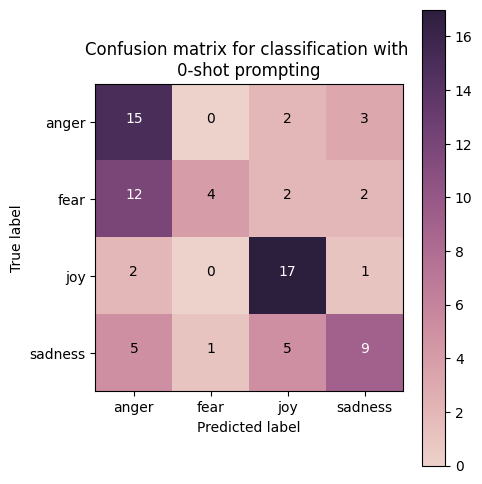

In [127]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @NessaMatthews he's perfect. But not even in that way where you sort of resent him or suspect that he leads a double life. Just perfect.
Class: anger

Text: @JackAndAHat butter up the walls, nightmare
Class: fear

Text: @followAdamA looking back on recent tweets seen, this one right here is great #perfect  #Speechless #deal
Class: joy

Text: Don't get discouraged when simple minds don't see your vision
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:13<00:03,  1.43it/s]

Rate limit of 15 requests per minute reached. Waiting for 46.78 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.48it/s]

Rate limit of 15 requests per minute reached. Waiting for 40.91 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:09,  1.52it/s]

Rate limit of 15 requests per minute reached. Waiting for 43.30 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.43 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:03,  1.26it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.96 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.70s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.40      0.80      0.53        20
        fear       0.83      0.25      0.38        20
         joy       0.71      0.60      0.65        20
     sadness       0.71      0.60      0.65        20

    accuracy                           0.56        80
   macro avg       0.66      0.56      0.55        80
weighted avg       0.66      0.56      0.55        80



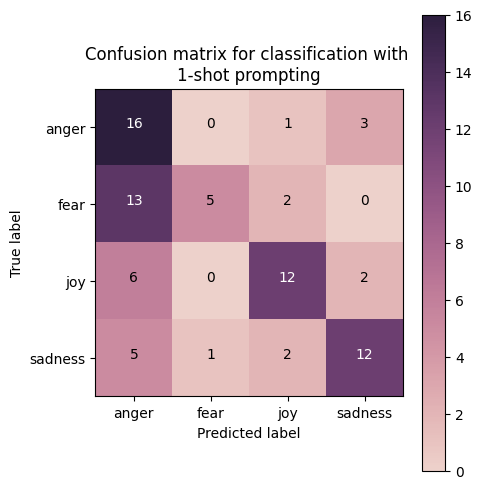

In [128]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @sippycoups if it hurts too much to eat, i read somewhere that marshmallows are good bc they are soft and don't irritate
Class: anger

Text: You can't fight the elephants until you have wrestled the pigs. #quoteoftheday 
Class: anger

Text: Zero help from @ups customer service. Just pushing the buck back and forth and promising callbacks that don’t happen.  #loathing
Class: anger

Text:  I can't guess if you holding a grudge against the best'
Class: anger

Text: Imagine the twitter fume if Corbyn loses the election and then Smith leads Labour to a worse result than suggested under Corbyn.. Imagine??
Class: anger

Text: #Trump is #afraid of the big, bad #Hillary. #election #PresidentialDebate #PresidentialElection2016 #orangehitler #skip #hide #coward #fear
Class: fear

Text: @ChickOfBeauty 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:14<00:04,  1.02it/s]

Rate limit of 15 requests per minute reached. Waiting for 45.58 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:09<00:07,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 41.07 seconds.
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Waiting to retry... Error: 'NoneType' object has no attribute 'replace'
test_text: @All4 is the android app it designed to be buggy and work sporadically on a fire TV box? 
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https:

Processing samples for emotion: fear...:  55%|█████▌    | 11/20 [02:42<07:08, 47.56s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Waiting to retry... Error: 'NoneType' object has no attribute 'replace'
test_text: ⊰ @FrameOfAnAngel ⊱ \n\n+ Of them. I'm here for answers, and if I scare her to death, there won't be answers for me. \n\nSo instead, I just +
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/ve

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.11 seconds.


Processing samples for emotion: sadness...:  15%|█▌        | 3/20 [01:04<04:11, 14.82s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.', 'status': 'RESOURCE_EXHAUSTED'}}
Waiting to retry... Error: 'NoneType' object has no attribute 'replace'
test_text: Chalk dance notation entree manchester inasmuch as corinthian products that discourage drag branding: ARwuEVfqv


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:42<00:12,  2.59s/it]

Rate limit of 15 requests per minute reached. Waiting for 5.84 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [02:02<00:00,  6.14s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 72.50%
              precision    recall  f1-score   support

       anger       0.57      0.80      0.67        20
        fear       0.89      0.40      0.55        20
         joy       0.86      0.90      0.88        20
     sadness       0.73      0.80      0.76        20

    accuracy                           0.72        80
   macro avg       0.76      0.73      0.71        80
weighted avg       0.76      0.72      0.71        80



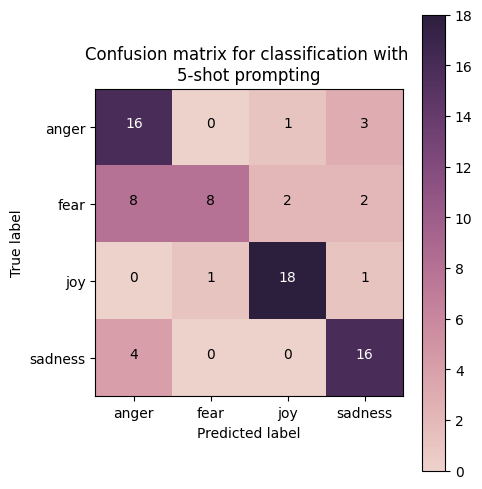

In [27]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
# 1.The overall accuracy dramatically increased by 16.25 percentage points from 1-shot to 5-shot, and the Macro F1-score jumped from 0.55 to 0.71. 
# This confirms that adding more examples allows the model to better grasp the task format and class definitions.

# 2.The primary issue with the 1-shot model was the high rate of misclassification where true "fear" samples were labeled as "anger," resulting in a very low recall of 0.25 for fear.

# 3.The 5-shot strategy successfully refined the decision boundary. In the 5-shot case, the misclassification of fear as anger was reduced, boosting the fear recall to 0.40

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [4]:
# Answer here
import pandas as pd
paths0="results/llm_classification_results/results_samples_20_shots_0.csv"
paths1="results/llm_classification_results/results_samples_20_shots_1.csv"
paths5="results/llm_classification_results/results_samples_20_shots_5.csv"

shot0 = pd.read_csv(paths0)
shot1 = pd.read_csv(paths1)
shot5 = pd.read_csv(paths5)

In [5]:
shot0

,text,true_emotion,predicted_emotion
0,Note to self ~ Stop laughing at things that of...,anger,anger
1,@gayla_weeks1 I try not to let my anger seep i...,anger,anger
2,@ArcticFantasy I would have almost took offens...,anger,anger
3,@pbhushan1 @IndianExpress so in your opinion i...,anger,anger
4,If I spend even 5 minutes with you and you alr...,anger,anger
...,...,...,...
75,Public products: high downhearted price tag co...,sadness,sadness
76,@Virgin_TrainsEC I feel for the conductor toni...,sadness,sadness
77,"Stars, when you shine,\nYou know how I feel.\n...",sadness,joy
78,amateur author Twitter might be the most depre...,sadness,sadness


In [17]:
#discuss  predict:anger     true:fear
df0 = shot0[(shot0['true_emotion'] == 'fear') & (shot0['predicted_emotion'] == 'anger')]['text']
df1 = shot1[(shot1['true_emotion'] == 'fear') & (shot1['predicted_emotion'] == 'anger')]['text']
df5 = shot5[(shot5['true_emotion'] == 'fear') & (shot5['predicted_emotion'] == 'anger')]['text']



In [20]:
for i in df0:
    print(i)

Nothing worse than an uber driver that can't drive. 
Northampton are awful 🙈
He called me fat, so I pushed him into the lockers then he threaten to sue me' 😂
@joey_coops yes Hun! Avoid at all costs!! #nightmare
@joey_coops yes Hun! Avoid at all costs!! 
@Evan_McMullin @TheBlazeRadio Classic SHITLIB bullshit. Create a horrible problem and then 'discuss' how to solve it. What a PIMP.
Hillary Clinton looked the other way to the Saudi war on women and their terror financing because they bought her off.
An adviser to the #European #Union’s top #court said #Hamas and the #Tamil #Tigers should be taken off the EU’s #terror list.#lka
@hollywooddivas @TMZ_Sports Idiots like Larry Sanders scare us All!How can Morons these days Rush 2 Judge #Police w/o all facts yet?FU thugs
@fatgirlhealthy @MBSCBILL ....so that what do to use violence and intimidation for a polictical agenda.; aka terrorism?
@All4 is the android app it designed to be buggy and work sporadically on a fire TV box? #shocking
If my 

In [21]:
for i in df1:
    print(i)

Nothing worse than an uber driver that can't drive. 
Northampton are awful 🙈
He called me fat, so I pushed him into the lockers then he threaten to sue me' 😂
@joey_coops yes Hun! Avoid at all costs!! 
@Evan_McMullin @TheBlazeRadio Classic SHITLIB bullshit. Create a horrible problem and then 'discuss' how to solve it. What a PIMP.
Hillary Clinton looked the other way to the Saudi war on women and their terror financing because they bought her off.
An adviser to the #European #Union’s top #court said #Hamas and the #Tamil #Tigers should be taken off the EU’s #terror list.#lka
@ccrago It was dreadful, even after he met the Catfish he still thought it was her!
@hollywooddivas @TMZ_Sports Idiots like Larry Sanders scare us All!How can Morons these days Rush 2 Judge #Police w/o all facts yet?FU thugs
@fatgirlhealthy @MBSCBILL ....so that what do to use violence and intimidation for a polictical agenda.; aka terrorism?
@All4 is the android app it designed to be buggy and work sporadically on 

In [22]:
for i in df5:
    print(i)

Staff on @ryainair FR1005. Asked for info and told to look online. You get what you pay for. #Ryanair @STN_Airport #Compensation 
@joey_coops yes Hun! Avoid at all costs!! 
@1johndes ball watching &amp; Rojo'd header was equally dreadful!!
@mikefreemanNFL \nIsn't OBrien supposed to be some sort of offensive genius #awful
Rooney shocking attempted cross
@All4 is the android app it designed to be buggy and work sporadically on a fire TV box? 
@JeffersonLake speaking of ex cobblers, saw Ricky Holmes at Charlton last week.. tracking back &amp; defending... I dread seeing Gorre on ball..
@CNNPolitics I can't wait to hear what he had to say about the brilliant Dr. Hawking... it should be rich... In the poorest of taste! #bully


In [ ]:
#discuss  predict:anger     true:fear
#無法正確地分類anger至fear
#Because both emotions manifest as high psychological and physiological activation (often marked by exclamation points, capitalization, intense verbs,
#or negative adjectives in text), the model easily captures this high arousal feature but struggles to differentiate the underlying action tendency

#EX.@All4 is the android app it designed to be buggy and work sporadically on a fire TV box? 
# This sentence describes something encountering a mistake, which sounds more like anger, but the label is fear.

In [23]:
#discuss  predict:sadness     true:fear
#一度正確，後又錯
df0 = shot0[(shot0['true_emotion'] == 'fear') & (shot0['predicted_emotion'] == 'sadness')]['text']
df1 = shot1[(shot1['true_emotion'] == 'fear') & (shot1['predicted_emotion'] == 'sadness')]['text']
df5 = shot5[(shot5['true_emotion'] == 'fear') & (shot5['predicted_emotion'] == 'sadness')]['text']

In [25]:
for i in df0:
    print(i)

@ccrago It was dreadful, even after he met the Catfish he still thought it was her!
@CesarSampao @thisisbolton don't get me started on town centre. Used to go every week.... not been for 18 months 


In [24]:
for i in df1:
    print(i)

In [ ]:
for i in df5:
    print(i)

@ccrago It was dreadful, even after he met the Catfish he still thought it was her!
@CesarSampao @thisisbolton don't get me started on town centre. Used to go every week.... not been for 18 months 


In [ ]:
#discuss  predict:sadness     true:fear
#一度正確，後又錯
#the cause is almost certainly bias or interference introduced by the prompt examples.
#The weight of the Few-shot examples is so high that they interfere with the precise boundaries
#of these two emotions established in the model's vast pre-trained knowledge, leading to a poorer fit on boundary cases.

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)